# Dataset GSE100344

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import mygene

## Exploring our Work Files

In [4]:
# First we generate a function to explore different files
# Set random seed for reproducibility
np.random.seed(42)
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor='white')

# Function to safely read and explore a file
def explore_file(file_path):
    print(f"\nExploring file: {file_path}")
    try:
        # Try reading as CSV first
        df = pd.read_csv(file_path, nrows=5)
        print("File read as CSV:")
    except:
        try:
            # If CSV fails, try reading as TSV
            df = pd.read_csv(file_path, sep='\t', nrows=5)
            print("File read as TSV:")
        except Exception as e:
            print(f"Error reading file: {str(e)}")
            return

    print(df.head())
    print("\nColumn names:")
    print(df.columns)
    print(f"\nShape: {df.shape}")

In [5]:
# Explore counts file
counts_file = '/Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/counts.txt'
explore_file(counts_file)


Exploring file: /Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/counts.txt
File read as CSV:
  # Program:featureCounts v2.0.1; Command:"featureCounts" "-T" "14" "-p" "-t" "exon" "-g" "gene_id" "-a" "/Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/genome/Homo_sapiens.GRCh38.112.gtf" "-o" "/Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/counts.txt" "/Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/2_STAR_alignment/SRR5739552_Aligned.sortedByCoord.out.bam" "/Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/2_STAR_alignment/SRR5739553_Aligned.sortedByCoord.out.bam" "/Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/2_STAR_alignment/SRR5739554_Aligned.sortedByCoord.out.bam" "/Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/2_STAR_alignment/SRR5739555_Aligned.sortedByCoord.out.bam" "/Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/2_STAR_alignment/SRR5739556_Aligned.sortedByCoord.out.bam" "/Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/2_STAR_alignment/SRR5739557_Aligned.sortedByCoord.out.bam" "/Volumes/BioinforSSD/DATASET

In [6]:
# Explore metadata files (we will only use the SraRunTable file to add metadata finally)
metadata_dir = '/Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/ALL_METADATA/'
for file in os.listdir(metadata_dir):
    if file.endswith('.csv') or file.endswith('.txt'):
        explore_file(os.path.join(metadata_dir, file))


Exploring file: /Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/ALL_METADATA/GSE100344_D16+_FPKM.csv
File read as CSV:
  tracking_id\tD16+_1_0\tD16+_2_0\tD16+_3_0\tD16+_4_0\tD16+_5_0\tD16+_6_0\tD16+_7_0\tD16+_8_0\tD16+_9_0\tD16+_10_0\tD16+_11_0\tD16+_12_0\tD16+_13_0\tD16+_14_0\tD16+_15_0\tD16+_16_0\tD16+_17_0\tD16+_18_0\tD16+_19_0\tD16+_20_0\tD16+_21_0\tD16+_22_0\tD16+_23_0\tD16+_24_0\tD16+_25_0\tD16+_26_0\tD16+_27_0\tD16+_28_0\tD16+_29_0\tD16+_30_0\tD16+_31_0\tD16+_32_0\tD16+_33_0\tD16+_34_0\tD16+_35_0\tD16+_36_0\tD16+_37_0\tD16+_38_0\tD16+_39_0\tD16+_40_0\tD16+_41_0\tD16+_42_0\tD16+_43_0\tD16+_44_0\tD16+_45_0\tD16+_46_0\tD16+_47_0\tD16+_48_0\tD16+_49_0\tD16+_50_0\tD16+_51_0\tD16+_52_0\tD16+_53_0\tD16+_54_0\tD16+_55_0\tD16+_56_0\tD16+_57_0\tD16+_58_0\tD16+_59_0\tD16+_60_0\tD16+_61_0\tD16+_62_0\tD16+_63_0\tD16+_64_0\tD16+_65_0\tD16+_66_0\tD16+_67_0\tD16+_68_0\tD16+_69_0\tD16+_70_0\tD16+_71_0\tD16+_72_0\tD16+_73_0\tD16+_74_0\tD16+_75_0\tD16+_76_0\tD16+_77_0\tD16+_78_0\tD16+_79_0\tD16+_80_

In [7]:
# Exploring columns names and unique values en ieach column of SraRunTable file

def explore_sra_table_with_delimiter_detection(file_path):
    # First, let's try to detect the delimiter
    with open(file_path, 'r') as csvfile:
        dialect = csv.Sniffer().sniff(csvfile.read(1024))
        csvfile.seek(0)

    # Print the detected delimiter
    print(f"Detected delimiter: '{dialect.delimiter}'")
        
    # Now read the file with the detected delimiter
    df = pd.read_csv(file_path, sep=dialect.delimiter)
    
    # Display column names
    print("Column names:")
    for i, column in enumerate(df.columns, 1):
        print(f"{i}. {column}")
    
    # Display unique values for each column
    print("\nUnique values in each column:")
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"\n{column}:")
        if len(unique_values) > 10:
            print(f"  (Showing 10 out of {len(unique_values)} unique values)")
            print(f"  {unique_values[:10]}")
        else:
            print(f"  {unique_values}")

# Usage
file_path = '/Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/ALL_METADATA/SraRunTable.txt'
explore_sra_table_with_delimiter_detection(file_path)

Detected delimiter: ','
Column names:
1. Run
2. Assay Type
3. AvgSpotLen
4. Bases
5. BioProject
6. BioSample
7. Bytes
8. cell_line
9. Center Name
10. Consent
11. DATASTORE filetype
12. DATASTORE provider
13. DATASTORE region
14. Experiment
15. GEO_Accession (exp)
16. Instrument
17. LibraryLayout
18. LibrarySelection
19. LibrarySource
20. Organism
21. Platform
22. ReleaseDate
23. Sample Name
24. source_name
25. SRA Study
26. tra-1-60
27. treatment
28. create_date
29. version

Unique values in each column:

Run:
  (Showing 10 out of 480 unique values)
  ['SRR5739552' 'SRR5739553' 'SRR5739554' 'SRR5739555' 'SRR5739556'
 'SRR5739557' 'SRR5739558' 'SRR5739559' 'SRR5739560' 'SRR5739561']

Assay Type:
  ['RNA-Seq']

AvgSpotLen:
  [202]

Bases:
  (Showing 10 out of 480 unique values)
  [ 45597056 534458670 305381580 735039620 597957370 477312264   6638932
 126721266  57495058 547303244]

BioProject:
  ['PRJNA391419']

BioSample:
  (Showing 10 out of 480 unique values)
  ['SAMN07268127' 'SAMN07

## Modify column treatment to have Day_0, Day_2, Day_8, Day_16+ and Day_16-

In [8]:
# Now we create a new column called reprogramming_day integrating the unique values of treatmnt (wt, day2, day8, day16) and the positive and negative values of tra-1-60 column
# the new column will have the unique values: Day_0, Day_2, Day_8, Day_16+ and Day_16-

def update_treatment(row):
    if row['treatment'] == 'WT':
        return 'Day_0'
    elif 'BJ fibroblasts 2 days' in row['treatment']:
        return 'Day_2'
    elif 'BJ fibroblasts 8 days' in row['treatment']:
        return 'Day_8'
    elif 'BJ fibroblasts 16 days' in row['treatment']:
        if pd.isna(row['tra-1-60']):
            return 'Day_16'
        elif row['tra-1-60'] == 'Positive':
            return 'Day_16+'
        elif row['tra-1-60'] == 'Negative':
            return 'Day_16-'
    return 'Unknown'

def explore_sra_table_with_updated_treatment(file_path):
    df = pd.read_csv(file_path, sep=',')
    df['treatment'] = df.apply(update_treatment, axis=1)
    
    # Display information about the updated DataFrame
    print("\nColumn names:")
    for i, column in enumerate(df.columns, 1):
        print(f"{i}. {column}")
    
    print("\nUnique values in updated treatment column:")
    print(df['treatment'].unique())
    
    print("\nDistribution of updated treatment:")
    print(df['treatment'].value_counts())
    
    return df  # Return the updated DataFrame


## Reading working files

In [9]:
# File paths
counts_file = '/Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/counts.txt'
metadata_dir = '/Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/ALL_METADATA/'
sra_table_path = os.path.join(metadata_dir, 'SraRunTable.txt')

In [10]:
# Function to read counts file
def read_counts(file_path):
    # Read the file, skipping the first line (comment) and using the second line as header
    df = pd.read_csv(file_path, sep='\t', skiprows=1, index_col=0)
    
    # Remove unnecessary columns
    df = df.iloc[:, 5:]  # Assuming the counts start from the 6th column
    
    # Rename columns to match sample names
    df.columns = [col.split('/')[-1].replace('_Aligned.sortedByCoord.out.bam', '') for col in df.columns]
    
    return df

In [11]:
# Read counts data
try:
    counts = read_counts(counts_file)
    print("\nCounts data shape:", counts.shape)
    print("\nFirst few rows of counts data:")
    print(counts.head())
except Exception as e:
    print(f"Error reading counts file: {str(e)}")


Counts data shape: (63140, 480)

First few rows of counts data:
                 SRR5739552  SRR5739553  SRR5739554  SRR5739555  SRR5739556  \
Geneid                                                                        
ENSG00000228037           0           0           0           0           0   
ENSG00000142611           0           0           0           0           0   
ENSG00000284616           0           0           0           0           0   
ENSG00000157911           0           0           0           0           0   
ENSG00000260972           0           0           0           0           0   

                 SRR5739557  SRR5739558  SRR5739559  SRR5739560  SRR5739561  \
Geneid                                                                        
ENSG00000228037           0           0           0           0           0   
ENSG00000142611           0           0           0           0           0   
ENSG00000284616           0           0           0           0  

In [12]:
sra_metadata = explore_sra_table_with_updated_treatment(sra_table_path)


Column names:
1. Run
2. Assay Type
3. AvgSpotLen
4. Bases
5. BioProject
6. BioSample
7. Bytes
8. cell_line
9. Center Name
10. Consent
11. DATASTORE filetype
12. DATASTORE provider
13. DATASTORE region
14. Experiment
15. GEO_Accession (exp)
16. Instrument
17. LibraryLayout
18. LibrarySelection
19. LibrarySource
20. Organism
21. Platform
22. ReleaseDate
23. Sample Name
24. source_name
25. SRA Study
26. tra-1-60
27. treatment
28. create_date
29. version

Unique values in updated treatment column:
['Day_0' 'Day_2' 'Day_8' 'Day_16+' 'Day_16-']

Distribution of updated treatment:
treatment
Day_0      96
Day_2      96
Day_8      96
Day_16+    96
Day_16-    96
Name: count, dtype: int64


In [13]:
# Read SraRunTable
# This function not only reads the SraRunTable but also updates the 'treatment' column.
print("\nSRA metadata shape:", sra_metadata.shape)
print("\nColumns in SRA metadata:")
print(sra_metadata.columns)


SRA metadata shape: (480, 29)

Columns in SRA metadata:
Index(['Run', 'Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample',
       'Bytes', 'cell_line', 'Center Name', 'Consent', 'DATASTORE filetype',
       'DATASTORE provider', 'DATASTORE region', 'Experiment',
       'GEO_Accession (exp)', 'Instrument', 'LibraryLayout',
       'LibrarySelection', 'LibrarySource', 'Organism', 'Platform',
       'ReleaseDate', 'Sample Name', 'source_name', 'SRA Study', 'tra-1-60',
       'treatment', 'create_date', 'version'],
      dtype='object')


## Creating AnnData Object and adding metadata

In [14]:
# Create AnnData object
adata = sc.AnnData(X=counts.T)
adata.var_names_make_unique()

In [15]:
# Prepare metadata
metadata = sra_metadata.set_index('Run')[['cell_line', 'treatment']]

In [16]:
# Create condition column based on reprogramming_day
metadata['condition'] = metadata['treatment'].map({
    'Day_0': 'BJ',
    'Day_2': 'D2',
    'Day_8': 'D8',
    'Day_16-': 'D16-',
    'Day_16+': 'D16+'
})

In [17]:
# Add metadata to AnnData object
adata.obs = metadata.loc[adata.obs_names]

In [18]:
print("\nFinal AnnData object:")
print(adata)


Final AnnData object:
AnnData object with n_obs × n_vars = 480 × 63140
    obs: 'cell_line', 'treatment', 'condition'


## Preprocessing

In [19]:
# Basic preprocessing
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 5 cells that have less than 200 genes expressed
filtered out 38474 genes that are detected in less than 3 cells


In [20]:
# Calculate quality control metrics
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

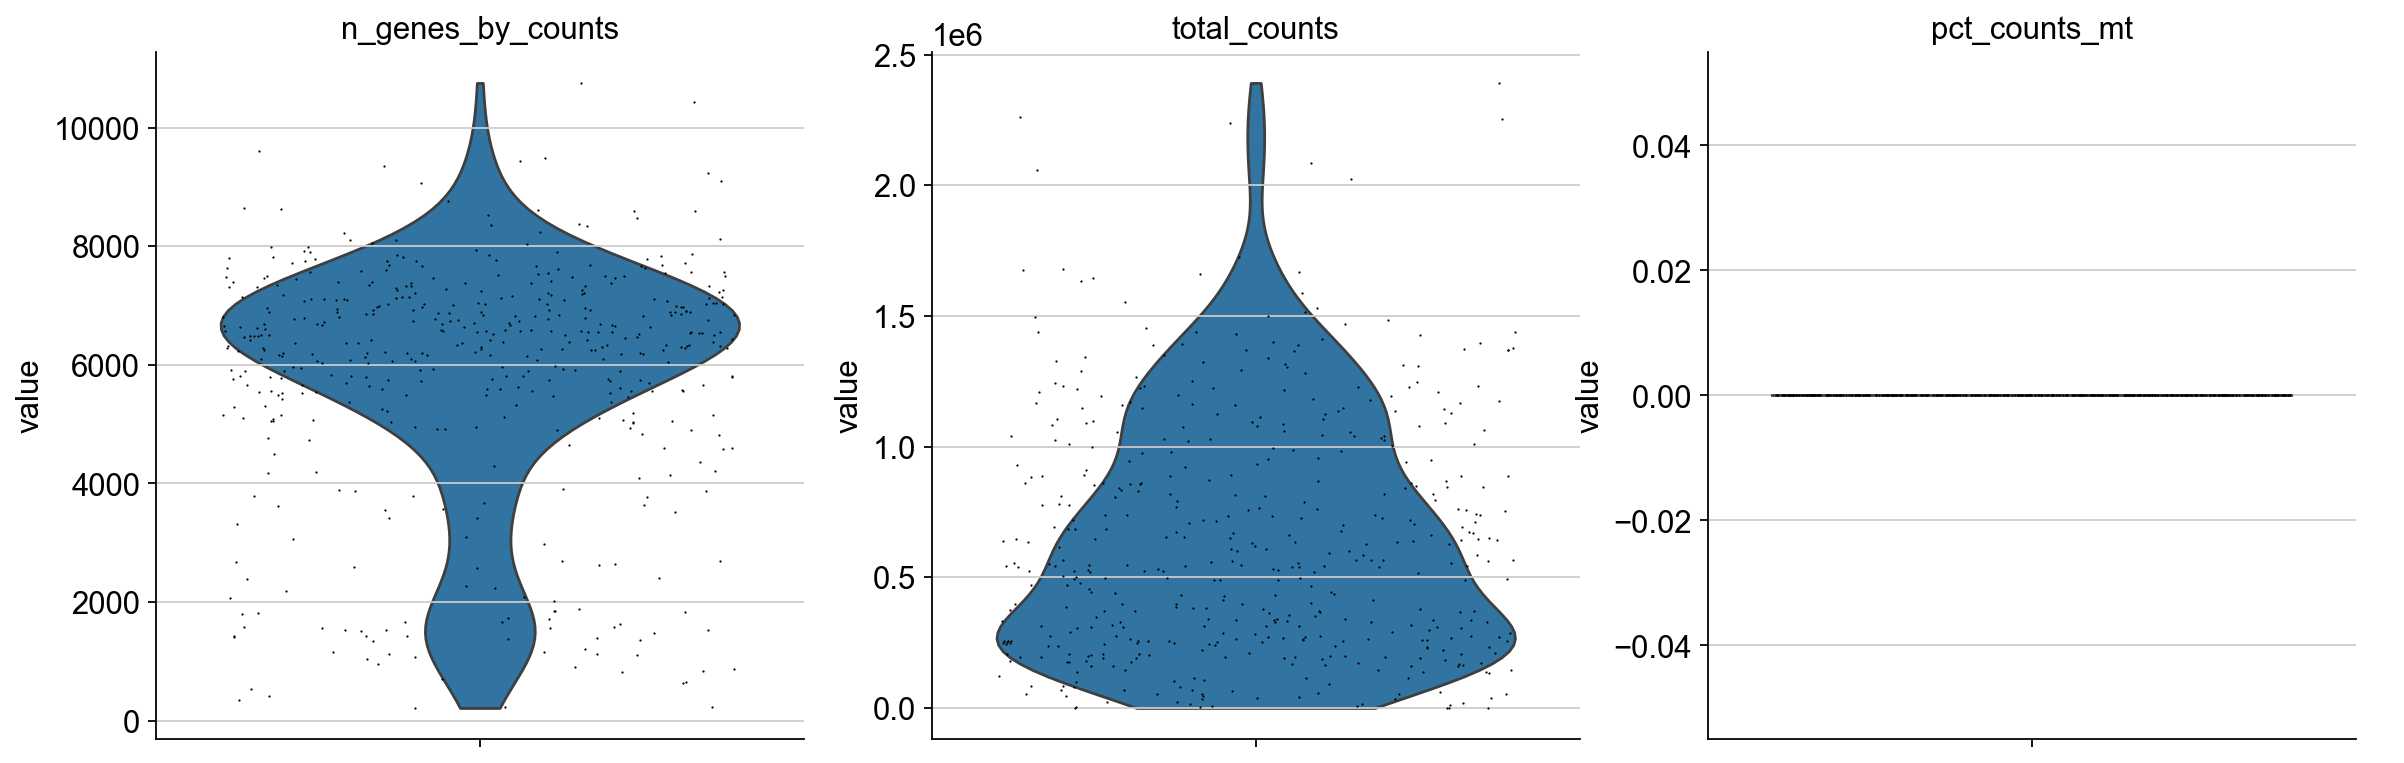

In [21]:
# Plot quality control metrics
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)
plt.savefig('qc_metrics.png')
plt.close()

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


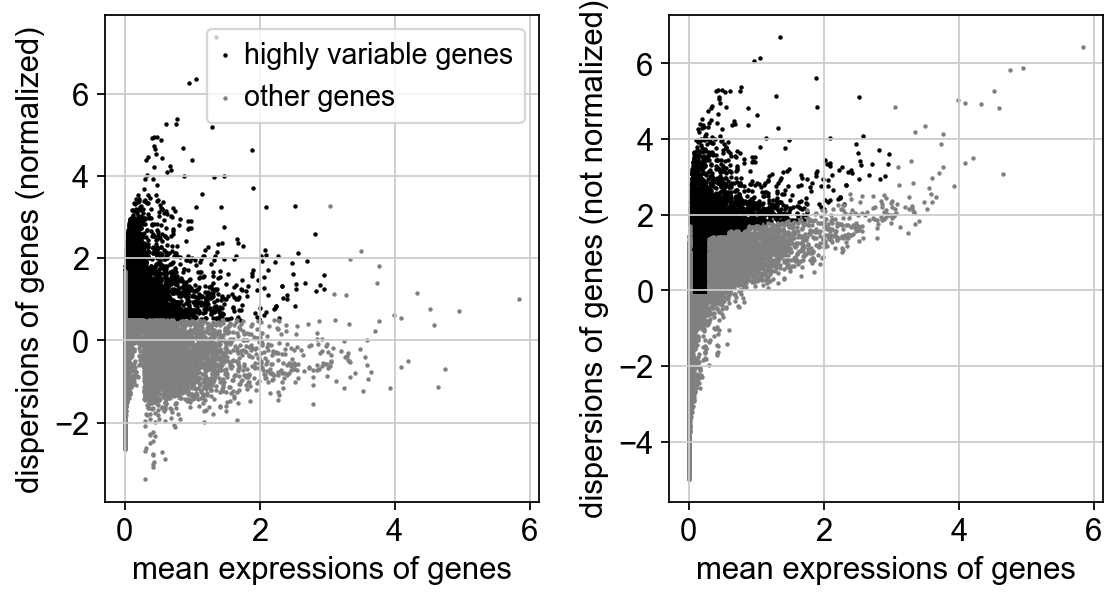

In [23]:
# Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
plt.savefig('highly_variable_genes.png')
plt.close()

In [24]:
# Perform dimensionality reduction and clustering
sc.pp.pca(adata, n_comps=50)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

computing PCA
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50


/opt/anaconda3/envs/scanpy_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/var/folders/n_/7v5qzhkd1hx_rx4s52x9zk8r0000gn/T/ipykernel_35312/3671636503.py:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


In [25]:
# Save the processed AnnData object
adata.write_h5ad("GSE100344.h5ad")

## Analysis


Columns in adata.obs:
Index(['cell_line', 'treatment', 'condition', 'n_genes', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'],
      dtype='object')

Unique values in 'treatment':
['Day_0', 'Day_2', 'Day_8', 'Day_16+', 'Day_16-']
Categories (5, object): ['Day_0', 'Day_2', 'Day_8', 'Day_16+', 'Day_16-']

Top 20 most expressed genes on Day 8:
                  gene  mean_expression
24626  ENSG00000210082         5.011218
8332   ENSG00000156508         4.810199
18189  ENSG00000182718         4.513179
24641  ENSG00000198712         4.466555
9549   ENSG00000075624         4.097703
24650  ENSG00000198886         4.026998
20415  ENSG00000184009         4.007889
24624  ENSG00000211459         3.973079
24638  ENSG00000198804         3.940140
16124  ENSG00000089157         3.929989
24657  ENSG00000198727         3.905279
14085  ENSG00000134333         3.849627
23793  ENSG00000100316         3.838911
22526  ENSG00000087086         3.724440
9029   ENSG00

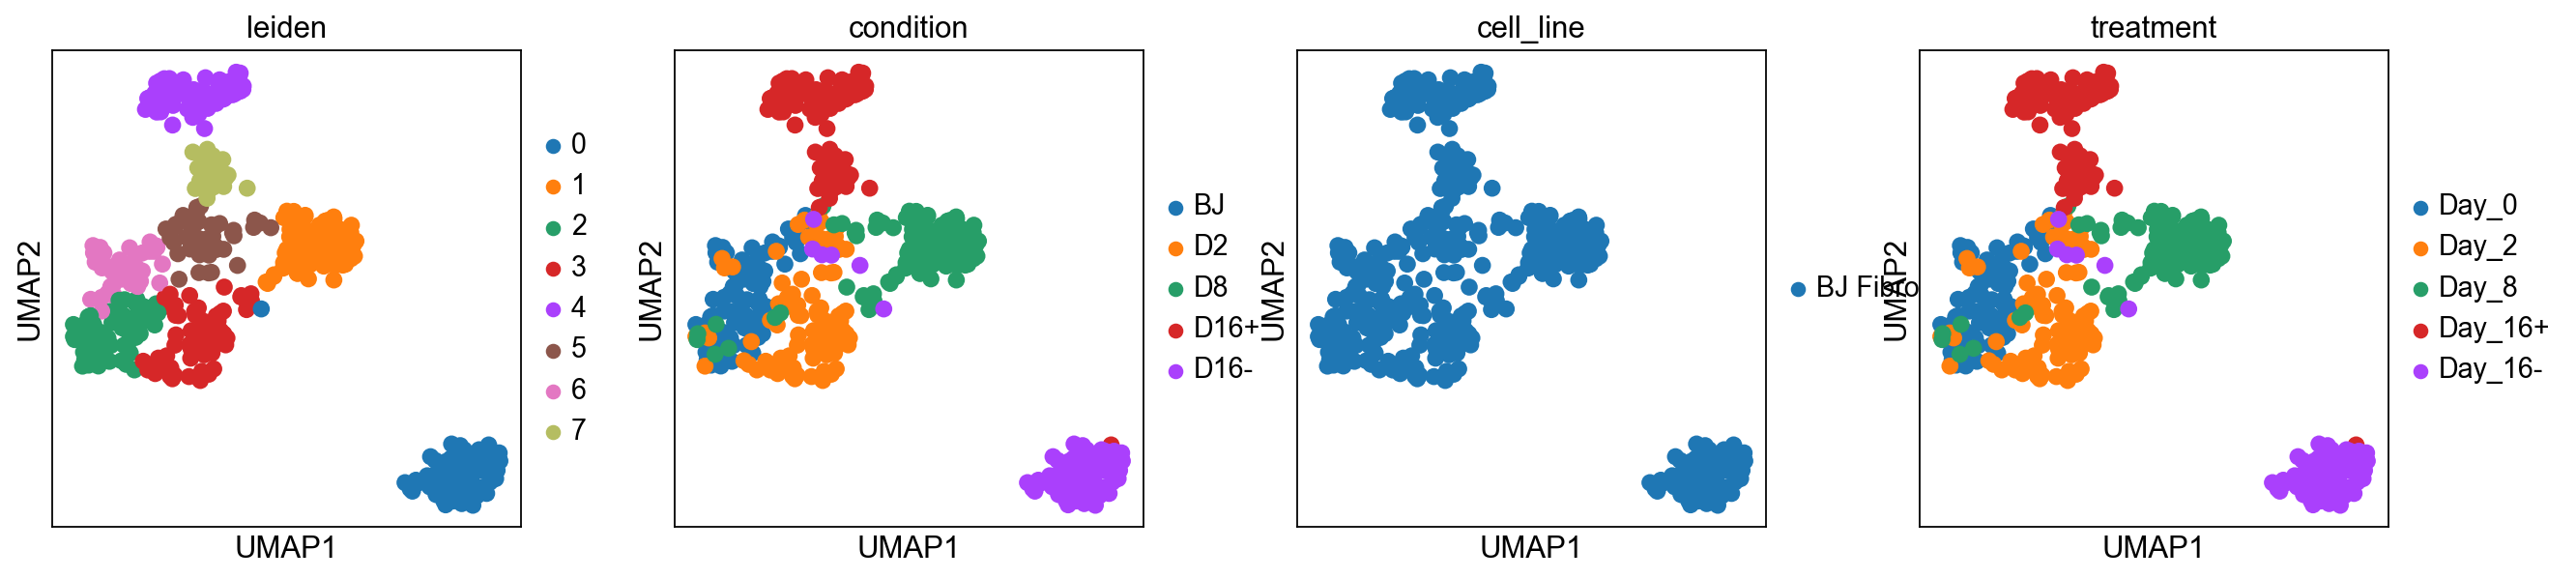


Processed AnnData object saved as GSE100344_processed.h5ad
Analysis complete. Check the output files for visualizations and the processed data.


In [27]:
# We check adata after creating the AnnData object and adding metadata

print("\nColumns in adata.obs:")
print(adata.obs.columns)
print("\nUnique values in 'treatment':")
print(adata.obs['treatment'].unique())

# Calculate mean expression for Day 8 cells
day8_cells = adata.obs['treatment'] == 'Day_8'
day8_mean_expression = adata.X[day8_cells].mean(axis=0)

# Create a DataFrame with gene names and mean expression
gene_expression = pd.DataFrame({
    'gene': adata.var_names,
    'mean_expression': day8_mean_expression
})

# Sort by mean expression and get top 20
top20_genes = gene_expression.sort_values('mean_expression', ascending=False).head(20)

print("\nTop 20 most expressed genes on Day 8:")
print(top20_genes)

# Plot top 20 most expressed genes for Day 8
plt.figure(figsize=(12, 8))
sns.barplot(x='mean_expression', y='gene', data=top20_genes)
plt.title('Top 20 Most Expressed Genes on Day 8')
plt.xlabel('Mean Expression')
plt.ylabel('Gene')
plt.tight_layout()
plt.savefig('top20_expressed_genes_day8.png')
plt.close()

# Visualize the results with updated treatment values
sc.pl.umap(adata, color=['leiden', 'condition', 'cell_line', 'treatment'])
plt.savefig('umap_plot_updated.png')
plt.close()

# Save the processed AnnData object
adata.write_h5ad("GSE100344.h5ad")

print("\nProcessed AnnData object saved as GSE100344_processed.h5ad")
print("Analysis complete. Check the output files for visualizations and the processed data.")

In [29]:
# Checking columns of adata
print("\nColumns in adata.obs:")
print(adata.obs.columns)
print(adata.var.columns)

for column in adata.obs.columns:
    print(f"\nUnique values in '{column}':")
    print(adata.obs[column].unique())



Columns in adata.obs:
Index(['cell_line', 'treatment', 'condition', 'n_genes', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden',
       'log1p_n_genes_by_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'],
      dtype='object')
Index(['n_cells', 'mt', 'n_cells_by_counts', 'mean_counts',
       'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means',
       'dispersions', 'dispersions_norm', 'log1p_mean_counts',
       'log1p_total_counts'],
      dtype='object')

Unique values in 'cell_line':
['BJ Fibroblasts']
Categories (1, object): ['BJ Fibroblasts']

Unique values in 'treatment':
['Day_0', 'Day_2', 'Day_8', 'Day_16+', 'Day_16-']
Categories (5, object): ['Day_0', 'Day_2', 'Day_8', 'Day_16+', 'Day_16-']

Unique values in 'condition':
['BJ', 'D2', 'D8', 'D16+', 'D16-']
Categories (5, object): ['BJ', 'D2', 'D8', 'D16+'

In [30]:
# Save in h5ad
adata.write_h5ad("GSE100344.h5ad")

## Adding gene_name info

In [31]:
# DO I CURRENTLY HAVE GENE NAMES ON FEATURECOUNTS OUTPUT?

import scanpy as sc
import pandas as pd

# Load your data
adata = sc.read_h5ad("GSE100344.h5ad")

# Print the first few gene identifiers
print("First few gene identifiers:")
print(adata.var_names[:5])

# Check if these look like Ensembl IDs (usually start with ENSG for human genes)
if adata.var_names[0].startswith("ENSG"):
    print("\nIt looks like you have Ensembl gene IDs.")
else:
    print("\nIt looks like you might have gene names or another type of identifier.")

# If you have a separate column for gene names, it might be in adata.var
if 'gene_name' in adata.var.columns:
    print("\nYou have a separate 'gene_name' column. First few entries:")
    print(adata.var['gene_name'][:5])
else:
    print("\nYou don't have a separate 'gene_name' column.")

print("\nColumns in adata.var:")
print(adata.var.columns)

First few gene identifiers:
Index(['ENSG00000157911', 'ENSG00000142655', 'ENSG00000171621',
       'ENSG00000142583', 'ENSG00000226457'],
      dtype='object', name='Geneid')

It looks like you have Ensembl gene IDs.

You don't have a separate 'gene_name' column.

Columns in adata.var:
Index(['n_cells', 'mt', 'n_cells_by_counts', 'mean_counts',
       'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means',
       'dispersions', 'dispersions_norm', 'log1p_mean_counts',
       'log1p_total_counts'],
      dtype='object')


In [32]:
# We only have gene_id so lets add gene_name info
# Load the data
adata = sc.read_h5ad("GSE100344.h5ad")

# Initialize mygene client
mg = mygene.MyGeneInfo()

# Get the current gene IDs
gene_ids = adata.var.index.tolist()

# Query mygene for gene names
gene_info = mg.getgenes(gene_ids, fields='symbol', species='human')

# Create a dictionary mapping gene IDs to gene names
gene_name_dict = {info['query']: info.get('symbol', 'Unknown') for info in gene_info}

# Add gene names to adata.var
adata.var['gene_name'] = adata.var.index.map(gene_name_dict)

# Save the updated AnnData object
adata.write_h5ad("GSE100344.h5ad")

# Print some information about the updated object
print("Updated columns in adata.var:")
print(adata.var.columns)

print("\nFirst few rows of adata.var:")
print(adata.var[['gene_name']].head())

print("\nShape of updated adata:", adata.shape)

# Function to print unique values
def print_unique_values(df, name, max_values=10):
    print(f"\nSample of unique values in {name}:")
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"\n{column}:")
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            print(list(unique_values[:max_values]) + (["..."] if len(unique_values) > max_values else []))
        elif np.issubdtype(df[column].dtype, np.number):
            if len(unique_values) > max_values:
                print(f"Min: {unique_values.min()}, Max: {unique_values.max()}")
            else:
                print(list(unique_values))
        else:
            print(list(unique_values[:max_values]) + (["..."] if len(unique_values) > max_values else []))
        print(f"Total unique values: {len(unique_values)}")

print_unique_values(adata.var, "adata.var")

Updated columns in adata.var:
Index(['n_cells', 'mt', 'n_cells_by_counts', 'mean_counts',
       'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means',
       'dispersions', 'dispersions_norm', 'log1p_mean_counts',
       'log1p_total_counts', 'gene_name'],
      dtype='object')

First few rows of adata.var:
                gene_name
Geneid                   
ENSG00000157911     PEX10
ENSG00000142655     PEX14
ENSG00000171621     SPSB1
ENSG00000142583    SLC2A5
ENSG00000226457   RPL22P3

Shape of updated adata: (475, 24666)

Sample of unique values in adata.var:

n_cells:
Min: 3, Max: 475
Total unique values: 473

mt:
[False]
Total unique values: 1

n_cells_by_counts:
Min: 3, Max: 475
Total unique values: 473

mean_counts:
Min: 4.3302265112288296e-05, Max: 5.388686656951904
Total unique values: 24663

pct_dropout_by_counts:
Min: 0.0, Max: 99.36842105263159
Total unique values: 473

total_counts:
Min: 0.020568575710058212, Max: 2559.626220703125
Total unique values: 24663


In [33]:
# Save in h5ad
adata.write_h5ad("GSE100344.h5ad")

## Final check

In [4]:
# Check adata. columns in obs and var, unique values..
# Load the data
adata = sc.read_h5ad("GSE100344_trimmed.h5ad")

print("\nUpdated columns in adata.obs:")
print(adata.obs.columns)

print("\nUpdated columns in adata.var:")
print(adata.var.columns)

print("\nShape of updated adata:", adata.shape)

# Display unique values in the cell_line column
print("\nUnique values in 'cell_line' column:")
print(adata.obs['cell_line'].unique())

# Optional: Display the distribution of cell lines
print("\nDistribution of cell lines:")
print(adata.obs['cell_line'].value_counts())

# Display unique values in the treatment column
print("\nUnique values in 'treatment' column:")
print(adata.obs['treatment'].unique())

# Optional: Display the distribution of treatments
print("\nDistribution of treatments:")
print(adata.obs['treatment'].value_counts())

# Optional: If you want to see a cross-tabulation of cell_line and treatment
print("\nCross-tabulation of cell_line and treatment:")
print(pd.crosstab(adata.obs['cell_line'], adata.obs['treatment']))


Updated columns in adata.obs:
Index(['cell_line', 'treatment', 'condition', 'n_genes', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden',
       'log1p_n_genes_by_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'],
      dtype='object')

Updated columns in adata.var:
Index(['n_cells', 'mt', 'n_cells_by_counts', 'mean_counts',
       'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means',
       'dispersions', 'dispersions_norm', 'log1p_mean_counts',
       'log1p_total_counts', 'gene_name'],
      dtype='object')

Shape of updated adata: (475, 24666)

Unique values in 'cell_line' column:
['BJ Fibroblasts']
Categories (1, object): ['BJ Fibroblasts']

Distribution of cell lines:
cell_line
BJ Fibroblasts    475
Name: count, dtype: int64

Unique values in 'treatment' column:
['Day_0', 'Day_2', 'Day_8', 'Day_16+', 'Day_16-'